## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('datasets/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('datasets/daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

with open('datasets/project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# def read_csv(filename):
#     with open(filename, 'rb') as f:
#         reader = unicodecsv.DictReader(f)
#         return list(reader)
# 
# enrollments = read_csv('datasets/enrollments.csv')
# daily_engagement = read_csv('datasets/daily_engagement.csv')
# project_submissions = read_csv('datasets/project_submissions.csv')

In [7]:
e_set = set([x['account_key'] for x in enrollments])
d_set = set([x['acct'] for x in daily_engagement])
p_set = set([x['account_key'] for x in project_submissions])

[len(e_set), len(d_set), len(p_set)]

[1302, 1237, 743]

## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for i, item in enumerate(daily_engagement):
    daily_engagement[i]['account_key'] = daily_engagement[i].pop('acct')
    

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

[x for x in enrollments if x['account_key'] not in d_set]


[{u'account_key': u'1219',
  u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 12, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'871',
  u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 13, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1218',
  u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 11, 15, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'654',
  u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0),
  u'days_to_cancel': 0,
  u'is_canceled': True,
  u'is_udacity': False,
  u'join_date': datetime.datetime(2014, 12, 4, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'654',
  u'cancel_date': datetime

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

[x for x in enrollments if x['account_key'] not in d_set and x['cancel_date'] != x['join_date']]


[{u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'days_to_cancel': 59,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 1, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1304',
  u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0),
  u'days_to_cancel': 99,
  u'is_canceled': True,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 3, 10, 0, 0),
  u'status': u'canceled'},
 {u'account_key': u'1101',
  u'cancel_date': None,
  u'days_to_cancel': None,
  u'is_canceled': False,
  u'is_udacity': True,
  u'join_date': datetime.datetime(2015, 2, 25, 0, 0),
  u'status': u'current'}]

## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
non_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
    else:
        non_test_accounts.add(enrollment['account_key'])
[len(udacity_test_accounts), len(non_test_accounts)]

[6, 1296]

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

# paid_students = {x['account_key']: x['join_date'] for x in non_udacity_enrollments if (not x['is_canceled'] or x['days_to_cancel'] > 7)}

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Refining the Question

In [15]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return 0 <= time_delta.days < 7

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = [x for x in daily_engagement
                                 if x['account_key'] in paid_students.keys()
                                 and within_one_week(paid_students[x['account_key']], x['utc_date'])]

In [18]:
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [21]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [22]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

paid_engagement_in_first_week[0]


{'account_key': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Lessons Completed in First Week

In [23]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

paid_accts = set([x['account_key'] for x in paid_engagement_in_first_week])
paid_dict = {x: 0 for x in paid_accts}
for i in paid_engagement_in_first_week:
    paid_dict[i['account_key']] += i['lessons_completed']

paid_lessons_comp = paid_dict.values()
[
np.mean(paid_lessons_comp),
np.std(paid_lessons_comp),
np.min(paid_lessons_comp),
np.max(paid_lessons_comp),
]


[1.636180904522613, 3.0025612998294227, 0, 36]

## Number of Visits in First Week

In [24]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

paid_accts = set([x['account_key'] for x in paid_engagement_in_first_week])
paid_dict = {x: 0 for x in paid_accts}
for i in paid_engagement_in_first_week:
    if i['total_minutes_visited'] > 0:
        paid_dict[i['account_key']] += 1

paid_lessons_comp = paid_dict.values()
[
np.mean(paid_lessons_comp),
np.std(paid_lessons_comp),
np.min(paid_lessons_comp),
np.max(paid_lessons_comp),
]


[2.8673366834170855, 2.2551980029196814, 0, 7]

## Splitting out Passing Students

In [25]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passed = set([x['account_key'] for x in non_udacity_submissions \
          if x['lesson_key'] in subway_project_lesson_keys \
          and x['assigned_rating'] in ['PASSED', 'DISTINCTION'] \
          and x['processing_state'] == 'EVALUATED'])

passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] in passed]
non_passing_engagement = [x for x in paid_engagement_in_first_week if x['account_key'] not in passed]

[
len(passing_engagement),
len(non_passing_engagement)
]


[4527, 2392]

In [26]:

passed = set([x['account_key'] for x in non_udacity_submissions \
          if x['assigned_rating'] in ['PASSED', 'DISTINCTION'] \
          and x['processing_state'] == 'EVALUATED'])

paid_accts = set([x['account_key'] for x in paid_engagement_in_first_week])

mins_pass = {x: 0 for x in paid_accts if x in passed}
mins_no_pass = {x: 0 for x in paid_accts if x not in passed}

lessons_pass = {x: 0 for x in paid_accts if x in passed}
lessons_no_pass = {x: 0 for x in paid_accts if x not in passed}

days_pass = {x: 0 for x in paid_accts if x in passed}
days_no_pass = {x: 0 for x in paid_accts if x not in passed}

for i in [x for x in paid_engagement_in_first_week if x['account_key'] in passed]:
    if i['total_minutes_visited'] > 0:
        mins_pass[i['account_key']] += i['total_minutes_visited']
        
for i in [x for x in paid_engagement_in_first_week if x['account_key'] not in passed]:
    if i['total_minutes_visited'] > 0:
        mins_no_pass[i['account_key']] += i['total_minutes_visited']
        
for i in [x for x in paid_engagement_in_first_week if x['account_key'] in passed]:
    lessons_pass[i['account_key']] += i['lessons_completed']
        
for i in [x for x in paid_engagement_in_first_week if x['account_key'] not in passed]:
    lessons_no_pass[i['account_key']] += i['lessons_completed']

for i in [x for x in paid_engagement_in_first_week if x['account_key'] in passed]:
    if i['total_minutes_visited'] > 0:
        days_pass[i['account_key']] += 1
        
for i in [x for x in paid_engagement_in_first_week if x['account_key'] not in passed]:
    if i['total_minutes_visited'] > 0:
        days_no_pass[i['account_key']] += 1
        


In [27]:
mins_pass.values()
[
np.mean(paid_lessons_comp),
np.std(paid_lessons_comp),
np.min(paid_lessons_comp),
np.max(paid_lessons_comp),
]

[2.8673366834170855, 2.2551980029196814, 0, 7]

## Comparing the Two Student Groups

In [28]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

mins_pass.values()


[1452.709982333,
 809.546996001,
 614.9778563333,
 494.88049616599994,
 248.12435916639998,
 713.3479524992999,
 392.473794834,
 35.531418,
 0,
 83.295313,
 1764.5367983344001,
 0,
 211.3875440003,
 307.3006509996,
 101.387314333,
 1482.9020456663002,
 213.4699951663,
 0,
 199.06043566667,
 338.67828999970004,
 405.600248833,
 421.6092228329,
 192.665344,
 497.8218254996,
 442.37721166627,
 0,
 0,
 0,
 0,
 488.40353200030006,
 335.5259626667,
 0,
 1047.649452501,
 311.07236283327,
 1166.4244791677,
 315.44705699977,
 931.3076661670001,
 383.1542506668,
 137.2655706667,
 7.94751166667,
 121.07599299993,
 402.42499849989997,
 1020.3306876671,
 830.83625116633,
 1203.2224428333002,
 70.48434450007001,
 1435.0160603327001,
 44.477798999970005,
 429.03252133340004,
 884.915487,
 0,
 143.048056833,
 0,
 0,
 670.3438828333,
 256.4187193326,
 109.5149769999,
 406.0453698336,
 303.55134400000003,
 61.33310733329999,
 619.9953998326,
 514.0743979996,
 0,
 172.77872349963,
 20.247478,
 621.575570

## Making Histograms

In [33]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import seaborn as sns
import matplotlib.pyplot as plt

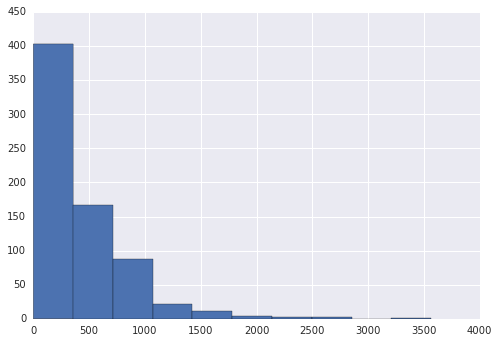

In [43]:
data = [x for x in mins_pass.values()]
data
plt.hist(data)
plt.show()

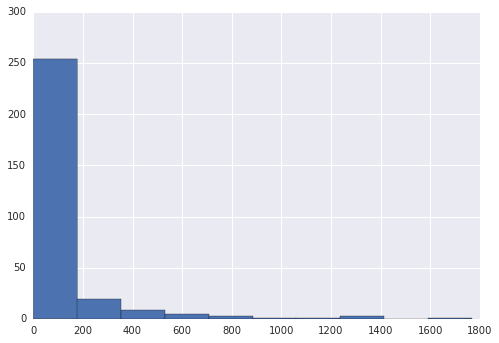

In [44]:
data = [x for x in mins_no_pass.values()]
data
plt.hist(data)
plt.show()

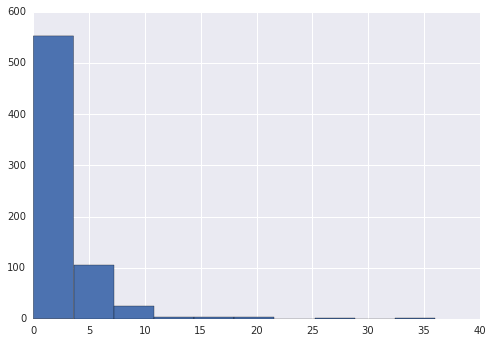

In [45]:
data = [x for x in lessons_pass.values()]
data
plt.hist(data)
plt.show()

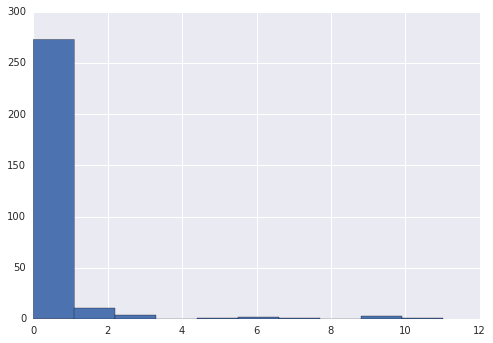

In [46]:
data = [x for x in lessons_no_pass.values()]
data
plt.hist(data)
plt.show()

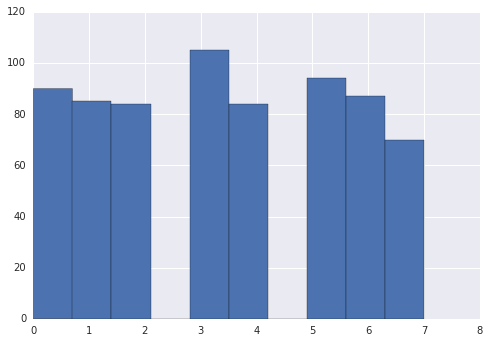

In [47]:
data = [x for x in days_pass.values()]
data
plt.hist(data)
plt.show()

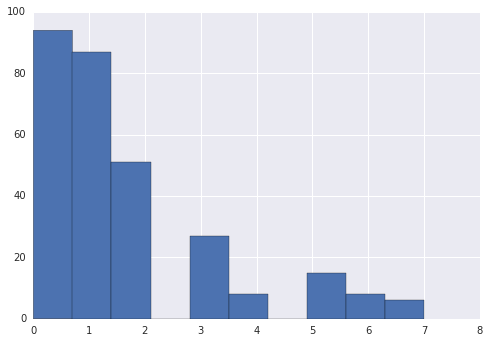

In [48]:
data = [x for x in days_no_pass.values()]
data
plt.hist(data)
plt.show()

## Improving Plots and Sharing Findings

In [42]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

